In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cProfile import label #?not sure

In [2]:
#removing space after authors 
def fix_author(row):
    if not isinstance(row, str) or row[-1] != ' ':
        return row
    return row[:-1]

In [3]:
#This is path to output csv files of the index of each book with they italicized names filtered out
vol1_path = '../input/index_without_itallics_csvs/vol1/vol1_index_pruned.csv'
vol2_path = '../input/index_without_itallics_csvs/vol2/vol2_index_pruned.csv'
vol3_path = '../input/index_without_itallics_csvs/vol3/vol3_index_pruned.csv'

vol1_df = pd.read_csv(vol1_path)
vol2_df = pd.read_csv(vol2_path)
vol3_df = pd.read_csv(vol3_path)

#fix spacing issue
vol1_df['author'] = vol1_df['author'].apply(fix_author)
vol2_df['author'] = vol2_df['author'].apply(fix_author)
vol3_df['author'] = vol3_df['author'].apply(fix_author)

#changing name of columns 
vol1_df.rename(columns={'genus': 'mouterde_genus', 'epithet': 'mouterde_epithet', 'author':'mouterde_author', 'infra':'mouterde_infra'}, inplace=True)
vol2_df.rename(columns={'genus': 'mouterde_genus', 'epithet': 'mouterde_epithet', 'author':'mouterde_author', 'infra':'mouterde_infra'}, inplace=True)
vol3_df.rename(columns={'genus': 'mouterde_genus', 'epithet': 'mouterde_epithet', 'author':'mouterde_author', 'infra':'mouterde_infra'}, inplace=True)

#wcvp 
text_wcvp_path = '../input/wcvp/wcvp_v9_jun_2022.txt'
wcvp_df = pd.read_csv(text_wcvp_path, sep = '|')

# PlayGround

In [4]:
vol1_df

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank
0,616,Acanthophyllum,NaN,NaN,NaN,genus
1,616,Acanthophyllum,kurdicum,NaN,Boiss. et Hausskn.,species
2,616,Achyranthes,NaN,NaN,NaN,genus
3,616,Achyranthes,aspera,NaN,L.,species
4,616,Adiantum,NaN,NaN,NaN,genus
...,...,...,...,...,...,...
1382,638,Vulpia,uniglumis,NaN,(Sol.) Dumort.,species
1383,638,Zannichellia,NaN,NaN,NaN,genus
1384,638,Zannichellia,palustris,NaN,L.,species
1385,638,Zostera,NaN,NaN,NaN,genus


In [5]:
#concat all index volumes into one #not sure if this is a good idea or bad one should check runtime ... will deal with it later :D

In [6]:
vol1_df

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank
0,616,Acanthophyllum,NaN,NaN,NaN,genus
1,616,Acanthophyllum,kurdicum,NaN,Boiss. et Hausskn.,species
2,616,Achyranthes,NaN,NaN,NaN,genus
3,616,Achyranthes,aspera,NaN,L.,species
4,616,Adiantum,NaN,NaN,NaN,genus
...,...,...,...,...,...,...
1382,638,Vulpia,uniglumis,NaN,(Sol.) Dumort.,species
1383,638,Zannichellia,NaN,NaN,NaN,genus
1384,638,Zannichellia,palustris,NaN,L.,species
1385,638,Zostera,NaN,NaN,NaN,genus


In [7]:
new_df = pd.merge(vol1_df, wcvp_df,  how='left', left_on=['mouterde_genus','mouterde_epithet'], right_on = ['genus','species'])

In [8]:
new_df.shape

(5122, 24)

In [9]:
new_df.iloc[:,:17]

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name
0,616,Acanthophyllum,NaN,NaN,NaN,genus,7385-1,Asteraceae,Acanthophyllum,NaN,NaN,Acanthophyllum,Hook. & Arn.,GENUS,Synonym,10161-1,Nassauvia
1,616,Acanthophyllum,NaN,NaN,NaN,genus,6156-1,Caryophyllaceae,Acanthophyllum,NaN,NaN,Acanthophyllum,C.A.Mey.,GENUS,Accepted,NaN,NaN
2,616,Acanthophyllum,kurdicum,NaN,Boiss. et Hausskn.,species,150248-1,Caryophyllaceae,Acanthophyllum,kurdicum,NaN,Acanthophyllum kurdicum,Boiss. & Hausskn.,SPECIES,Synonym,150226-1,Acanthophyllum crassifolium
3,616,Achyranthes,NaN,NaN,NaN,genus,327359-2,Amaranthaceae,Achyranthes,NaN,NaN,Achyranthes,L.,GENUS,Accepted,NaN,NaN
4,616,Achyranthes,aspera,NaN,L.,species,2468-2,Amaranthaceae,Achyranthes,aspera,NaN,Achyranthes aspera,L.,SPECIES,Accepted,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,638,Zannichellia,palustris,NaN,L.,species,77255740-1,Potamogetonaceae,Zannichellia,palustris,repens,Zannichellia palustris subsp. repens,(Boenn.) Schübl. & G.Martens,SUBSPECIES,Synonym,77170965-1,Zannichellia palustris subsp. palustris
5118,638,Zannichellia,palustris,NaN,L.,species,77255245-1,Potamogetonaceae,Zannichellia,palustris,rosenii,Zannichellia palustris subsp. rosenii,(Wallman) K.Richt.,SUBSPECIES,Synonym,77170965-1,Zannichellia palustris subsp. palustris
5119,638,Zannichellia,palustris,NaN,L.,species,77256049-1,Potamogetonaceae,Zannichellia,palustris,tenuis,Zannichellia palustris subsp. tenuis,(Reut.) Nyman,SUBSPECIES,Synonym,77170965-1,Zannichellia palustris subsp. palustris
5120,638,Zostera,NaN,NaN,NaN,genus,27873-1,Zosteraceae,Zostera,NaN,NaN,Zostera,L.,GENUS,Accepted,NaN,NaN


In [10]:
# excluding infra as vol1 doesn't have infra species (need to figure out how to deal with null values here) 
# Need to drop genus only entries as we don't have genus author for volumes 1 and 2 and can't match them with correct author 

no_genus_only_no_infra_vol1_df = vol1_df[~((vol1_df['mouterde_epithet']).isnull()) & ((vol1_df['mouterde_infra']).isnull())] 
no_infra_wcvp_df = wcvp_df[(wcvp_df['infraspecies']).isnull()]
species_only_df = pd.merge(no_genus_only_no_infra_vol1_df, no_infra_wcvp_df,  how='inner', 
                            left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author'], 
                            right_on = ['genus','species', 'authors'])

In [11]:
species_only_df['authors'][0]

'L.'

In [12]:
species_only_df['mouterde_author'][0]

'L.'

In [13]:
species_only_df.iloc[:,5:20]

,taxon rank,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name
0,species,2468-2,Amaranthaceae,Achyranthes,aspera,NaN,Achyranthes aspera,L.,SPECIES,Accepted,NaN,NaN,NaN,327359-2,Achyranthes
1,species,325030-2,Pteridaceae,Adiantum,capillus-veneris,NaN,Adiantum capillus-veneris,L.,SPECIES,Accepted,NaN,NaN,NaN,328214-2,Adiantum
2,species,384562-1,Poaceae,Aegilops,biuncialis,NaN,Aegilops biuncialis,Vis.,SPECIES,Accepted,NaN,NaN,NaN,17369-1,Aegilops
3,species,384571-1,Poaceae,Aegilops,caudata,NaN,Aegilops caudata,L.,SPECIES,Accepted,NaN,NaN,NaN,17369-1,Aegilops
4,species,384573-1,Poaceae,Aegilops,columnaris,NaN,Aegilops columnaris,Zhuk.,SPECIES,Accepted,NaN,NaN,NaN,17369-1,Aegilops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,species,159731-1,Caryophyllaceae,Velezia,rigida,NaN,Velezia rigida,L.,SPECIES,Synonym,153658-1,Dianthus nudiflorus,Griff.,NaN,NaN
436,species,300881-2,Santalaceae,Viscum,album,NaN,Viscum album,L.,SPECIES,Accepted,NaN,NaN,NaN,30000304-2,Viscum
437,species,267588-2,Poaceae,Vulpia,dertonensis,NaN,Vulpia dertonensis,(All.) Gola,SPECIES,Synonym,402472-1,Festuca bromoides,L.,NaN,NaN
438,species,603593-1,Potamogetonaceae,Zannichellia,palustris,NaN,Zannichellia palustris,L.,SPECIES,Accepted,NaN,NaN,NaN,27871-1,Zannichellia


In [14]:
#expect to get 0 if everything is matched correctly --- nvm doing something different now 
vol1_df.shape[0] - vol1_df['mouterde_genus'].unique().shape[0] - species_only_df.shape[0]

627

In [15]:
species_only_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_author', 'taxonomic_status', 'genus', 'species', 'authors']]

,mouterde_genus,mouterde_epithet,mouterde_author,taxonomic_status,genus,species,authors
0,Achyranthes,aspera,L.,Accepted,Achyranthes,aspera,L.
1,Adiantum,capillus-veneris,L.,Accepted,Adiantum,capillus-veneris,L.
2,Aegilops,biuncialis,Vis.,Accepted,Aegilops,biuncialis,Vis.
3,Aegilops,caudata,L.,Accepted,Aegilops,caudata,L.
4,Aegilops,columnaris,Zhuk.,Accepted,Aegilops,columnaris,Zhuk.
...,...,...,...,...,...,...,...
435,Velezia,rigida,L.,Synonym,Velezia,rigida,L.
436,Viscum,album,L.,Accepted,Viscum,album,L.
437,Vulpia,dertonensis,(All.) Gola,Synonym,Vulpia,dertonensis,(All.) Gola
438,Zannichellia,palustris,L.,Accepted,Zannichellia,palustris,L.


In [16]:
with_accepted_name = species_only_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]

In [17]:
with_accepted_name[with_accepted_name['taxonomic_status'] == 'Synonym']

,mouterde_genus,mouterde_epithet,mouterde_author,taxonomic_status,accepted_name,accepted_authors
7,Aegilops,ovata,L.,Synonym,Aegilops neglecta,Req. ex Bertol.
9,Aegilops,squarrosa,L.,Synonym,Aegilops triuncialis,L.
10,Aegilops,triaristata,Willd.,Synonym,Aegilops neglecta,Req. ex Bertol.
28,Allium,eriophyllum,Boiss.,Synonym,Allium longisepalum,Bertol.
30,Allium,hierochuntinum,Boiss.,Synonym,Allium ascalonicum,L.
47,Alopecurus,ventricosus,Pers.,Synonym,Alopecurus arundinaceus,Poir.
52,Amaranthus,lividus,L.,Synonym,Amaranthus blitum subsp. oleraceus,(L.) Costea
62,Aristolochia,altissima,Desf.,Synonym,Aristolochia sempervirens,L.
64,Aristolochia,scabridula,Boiss.,Synonym,Aristolochia paecilantha,Boiss.
83,Atriplex,hastata,L.,Synonym,Atriplex prostrata subsp. calotheca,(Rafn) M.A.Gust.


In [18]:
species_only_df

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank,kew_id,family,genus,species,...,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id
0,616,Achyranthes,aspera,NaN,L.,species,2468-2,Amaranthaceae,Achyranthes,aspera,...,Accepted,NaN,NaN,NaN,327359-2,Achyranthes,L.,In review,Sp. Pl.: 204 (1753),NaN
1,616,Adiantum,capillus-veneris,NaN,L.,species,325030-2,Pteridaceae,Adiantum,capillus-veneris,...,Accepted,NaN,NaN,NaN,328214-2,Adiantum,L.,In review,Sp. Pl.: 1096 (1753),NaN
2,616,Aegilops,biuncialis,NaN,Vis.,species,384562-1,Poaceae,Aegilops,biuncialis,...,Accepted,NaN,NaN,NaN,17369-1,Aegilops,L.,Reviewed,"Fl. Dalmat.: t. 1, f. 2 (1842)",NaN
3,616,Aegilops,caudata,NaN,L.,species,384571-1,Poaceae,Aegilops,caudata,...,Accepted,NaN,NaN,NaN,17369-1,Aegilops,L.,Reviewed,Sp. Pl.: 1051 (1753),NaN
4,616,Aegilops,columnaris,NaN,Zhuk.,species,384573-1,Poaceae,Aegilops,columnaris,...,Accepted,NaN,NaN,NaN,17369-1,Aegilops,L.,Reviewed,Trudy Prikl. Bot. 18: 489 (1928),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,637,Velezia,rigida,NaN,L.,species,159731-1,Caryophyllaceae,Velezia,rigida,...,Synonym,153658-1,Dianthus nudiflorus,Griff.,NaN,NaN,NaN,In review,Sp. Pl.: 332 (1753),NaN
436,637,Viscum,album,NaN,L.,species,300881-2,Santalaceae,Viscum,album,...,Accepted,NaN,NaN,NaN,30000304-2,Viscum,L.,In review,Sp. Pl.: 1023 (1753),NaN
437,638,Vulpia,dertonensis,NaN,(All.) Gola,species,267588-2,Poaceae,Vulpia,dertonensis,...,Synonym,402472-1,Festuca bromoides,L.,NaN,NaN,NaN,Reviewed,Malpighia 18: 266 (1904),393674-1
438,638,Zannichellia,palustris,NaN,L.,species,603593-1,Potamogetonaceae,Zannichellia,palustris,...,Accepted,NaN,NaN,NaN,27871-1,Zannichellia,P.Micheli ex L.,Reviewed,Sp. Pl.: 969 (1753),NaN


# Exact Matching

In [19]:
wcvp_df['infraspecies'].replace(np.nan, 'np.NaN', inplace=True)
wcvp_df['species'].replace(np.nan, 'np.NaN', inplace=True)

## Vol1 

In [20]:
vol1_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol1_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol1_df['mouterde_author'] = vol1_df['mouterde_author'].str.replace(' et ', ' & ')

vol1_wcvp_df = pd.merge(vol1_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], 
                        right_on = ['genus','species', 'authors', 'infraspecies'])
vol1_wcvp_df.replace('np.NaN', np.nan, inplace=True)

In [21]:
vol1_wcvp_df_simplified = vol1_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]
#output1 = '../output/fuzzy_matching/index/exact_matching/vol1_index_noItalics_wcvp.csv'
#vol1_wcvp_df_simplified.to_csv(output1)

In [22]:
#percentage picked up with exact matching
vol1_wcvp_df_simplified.shape[0]/vol1_df.shape[0]

0.3330930064888248

In [23]:
#percentage of picked up species with exact matching that are accepted 
#.sum == .value_counts()[True] here
(vol1_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol1_wcvp_df_simplified.shape[0]

0.7164502164502164

## Vol2

In [24]:
vol2_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol2_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol2_df['mouterde_author'] = vol2_df['mouterde_author'].str.replace(' et ', ' & ')

vol2_wcvp_df = pd.merge(vol2_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], 
                        right_on = ['genus','species', 'authors', 'infraspecies'])
vol2_wcvp_df.replace('np.NaN', np.nan, inplace=True)

In [25]:
vol2_wcvp_df_simplified = vol2_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]
output2 = '../output/fuzzy_matching/index/exact_matching/vol2_index_noItalics_wcvp.csv'
vol2_wcvp_df_simplified.to_csv(output2)

In [26]:
#percentage picked up with exact matching
vol2_wcvp_df_simplified.shape[0]/vol2_df.shape[0]

0.39576213260423787

In [27]:
#percentage of picked up species with exact matching that are accepted 
#.sum == .value_counts()[True] here
(vol2_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol2_wcvp_df_simplified.shape[0]

0.7599309153713298

## Vol3

In [28]:
vol3_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_author'] = vol3_df['mouterde_author'].str.replace(' et ', ' & ')

vol3_wcvp_df = pd.merge(vol3_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], 
                        right_on = ['genus','species', 'authors', 'infraspecies'])

vol3_wcvp_df.replace('np.NaN', np.nan, inplace=True)

In [29]:
vol3_wcvp_df_simplified = vol3_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]
#output3 = '../output/fuzzy_matching/index/exact_matching/vol3_index_noItalics_wcvp.csv'
#vol3_wcvp_df_simplified.to_csv(output3)

In [30]:
"""vol3_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_author'] = vol3_df['mouterde_author'].str.replace(' et ', ' & ')


vol3_wcvp_df = pd.merge(vol3_df, 
                        wcvp_df, 
                        how='left', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], 
                        right_on = ['genus','species', 'authors', 'infraspecies'])

vol3_wcvp_df.replace('np.NaN', np.nan, inplace=True)
vol3_wcvp_df = vol3_wcvp_df[vol3_wcvp_df['genus'].isna()]

vol3_wcvp_df_simplified = vol3_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]"""


"vol3_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)\nvol3_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)\nvol3_df['mouterde_author'] = vol3_df['mouterde_author'].str.replace(' et ', ' & ')\n\n\nvol3_wcvp_df = pd.merge(vol3_df, \n                        wcvp_df, \n                        how='left', \n                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], \n                        right_on = ['genus','species', 'authors', 'infraspecies'])\n\nvol3_wcvp_df.replace('np.NaN', np.nan, inplace=True)\nvol3_wcvp_df = vol3_wcvp_df[vol3_wcvp_df['genus'].isna()]\n\nvol3_wcvp_df_simplified = vol3_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]"

In [31]:
vol3_wcvp_df_simplified.head(30)

,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxonomic_status,accepted_name,accepted_authors
0,Acantholepis,orientalis,NaN,Less.,Homotypic_Synonym,Echinops acantholepis,Jaub. & Spach
1,Acantholimon,NaN,NaN,Boiss.,Accepted,NaN,NaN
2,Acantholimon,acerosum,NaN,(Willd.) Boiss.,Accepted,NaN,NaN
3,Acantholimon,damassanum,NaN,Mobayen,Accepted,NaN,NaN
4,Acantholimon,libanoticum,NaN,Boiss.,Accepted,NaN,NaN
5,Acanthus,NaN,NaN,L.,Accepted,NaN,NaN
6,Acanthus,dioscoridis,NaN,L.,Accepted,NaN,NaN
7,Acanthus,mollis,NaN,L.,Accepted,NaN,NaN
8,Acanthus,syriacus,NaN,Boiss.,Homotypic_Synonym,Acanthus hirsutus subsp. syriacus,(Boiss.) Brummitt
9,Achillea,NaN,NaN,L.,Accepted,NaN,NaN


In [32]:
wcvp_df[wcvp_df['authors'] == 'DC.']

,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id
2289,4007-1,Acanthaceae,Boutonia,np.NaN,np.NaN,Boutonia,DC.,GENUS,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,In review,Rev. Bignon.: 18 (1838),NaN
2290,109112-1,Acanthaceae,Boutonia,cuspidata,np.NaN,Boutonia cuspidata,DC.,SPECIES,Accepted,NaN,NaN,NaN,4007-1,Boutonia,DC.,In review,Rev. Bignon.: 18 (1838),NaN
2333,430-1,Acanthaceae,Bravaisia,np.NaN,np.NaN,Bravaisia,DC.,GENUS,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,In review,"Biblioth. Universelle Genève, n.s., 17: 124 (1...",NaN
2335,46639-1,Acanthaceae,Bravaisia,floribunda,np.NaN,Bravaisia floribunda,DC.,SPECIES,Synonym,36223-2,Bravaisia integerrima,(Spreng.) Standl.,NaN,NaN,NaN,In review,"Biblioth. Universelle Genève, n.s., 17: 133 (1...",NaN
9931,797-1,Acanthaceae,Periblema,np.NaN,np.NaN,Periblema,DC.,GENUS,Synonym,4007-1,Boutonia,DC.,NaN,NaN,NaN,In review,"Ann. Sci. Nat., Bot., sér. 2, 11: 296 (1839)",4007-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232126,873206-1,Zygophyllaceae,Fagonia,olivieri,np.NaN,Fagonia olivieri,DC.,SPECIES,Homotypic_Synonym,77184935-1,Zygophyllum olivieri,(DC.) Christenh. & Byng,NaN,NaN,NaN,In review,Prodr. 1: 704 (1824),NaN
1232137,873213-1,Zygophyllaceae,Fagonia,persica,np.NaN,Fagonia persica,DC.,SPECIES,Synonym,77184914-1,Zygophyllum indicum,(Burm.f.) Christenh. & Byng,NaN,NaN,NaN,In review,Prodr. 1: 704 (1824),873184-1
1232647,873516-1,Zygophyllaceae,Zygophyllum,billardierei,np.NaN,Zygophyllum billardierei,DC.,SPECIES,Homotypic_Synonym,50425583-2,Roepera billardierei,(DC.) G.Don,NaN,NaN,NaN,In review,Prodr. 1: 705 (1824),NaN
1232718,873566-1,Zygophyllaceae,Zygophyllum,fruticulosum,np.NaN,Zygophyllum fruticulosum,DC.,SPECIES,Homotypic_Synonym,50425584-2,Roepera fruticulosa,(DC.) G.Don,NaN,NaN,NaN,In review,Prodr. 1: 705 (1824),NaN


In [33]:
genus = "Alkanna"
species = "kotschyana"
wcvp_df[(wcvp_df['genus'] == genus) & (wcvp_df['species'] == species)]

,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id
288027,112712-1,Boraginaceae,Alkanna,kotschyana,np.NaN,Alkanna kotschyana,A.DC.,SPECIES,Accepted,NaN,NaN,NaN,331332-2,Alkanna,Tausch,In review,"A.P.de Candolle, Prodr. 10: 98 (1846)",NaN


In [34]:
genus = "Alkanna"
species = "kotschyana"
wcvp_df[(wcvp_df['genus'] == genus) & (wcvp_df['species'] == species)]

,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id
288027,112712-1,Boraginaceae,Alkanna,kotschyana,np.NaN,Alkanna kotschyana,A.DC.,SPECIES,Accepted,NaN,NaN,NaN,331332-2,Alkanna,Tausch,In review,"A.P.de Candolle, Prodr. 10: 98 (1846)",NaN


In [35]:
#percentage picked up with exact matching
vol3_wcvp_df_simplified.shape[0]/vol3_df.shape[0]

0.532059186189889

In [36]:
#percentage of picked up species with exact matching that are accepted 
#.sum == .value_counts()[True] here
(vol3_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol3_wcvp_df_simplified.shape[0]

0.831981460023175

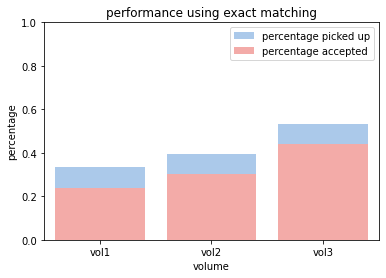

In [38]:
pick_up_rates = [vol1_wcvp_df_simplified.shape[0]/vol1_df.shape[0],
                 vol2_wcvp_df_simplified.shape[0]/vol2_df.shape[0],
                 vol3_wcvp_df_simplified.shape[0]/vol3_df.shape[0]]
accepted_rate = [(vol1_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol1_df.shape[0],
                 (vol2_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol2_df.shape[0],
                 (vol3_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol3_df.shape[0]]

ax = plt.subplots()

pastel_blue = sns.color_palette("pastel")[0]
pastel_red = sns.color_palette("pastel")[3]

ax = sns.barplot(x=['vol1', 'vol2', 'vol3'], y=pick_up_rates, color=pastel_blue, label = 'percentage picked up')
ax = sns.barplot(x=['vol1', 'vol2', 'vol3'], y=accepted_rate, color=pastel_red, label = 'percentage accepted')

ax.set(xlabel="volume", ylabel="percentage", title = "performance using exact matching", ylim=(0,1))

plt.legend()
plt.show()

Maryam Sedaghatpour to Everyone (11:09 AM)
IPNI
internatial plant nomenclature inxed
https://ipni.org/?q=Poa%20falcata
Me to Everyone (11:37 AM)
https://en.wikipedia.org/wiki/Author_citation_(botany)#:~:text=When%20%22ex%22%20is%20a%20component,author%20in%20a%20subsequent%20publication).
Me to Everyone (11:37 AM)
Andropogon aromaticus Sieber ex Schult.
indicates that Josef Schultes validly published this name (in 1824 in this instance), but his description was based on an earlier description by Franz Sieber. (Note that in botany, the author of the earlier name precedes the later, valid one; in zoology, this sequence, where present, is reversed.)
Maryam Sedaghatpour to Everyone (11:43 AM)
World Flora online r package
Maryam Sedaghatpour to Everyone (11:43 AM)
WFO.match()
Me to Everyone (11:53 AM)
abd-el-asisii
Maryam Sedaghatpour to Everyone (12:02 PM)
https://ipni.org/a/2064-1
Me to Everyone (12:03 PM)
Boutonia cuspidata
Maryam Sedaghatpour to Everyone (12:03 PM)
https://ipni.org/a/16855-1

In [62]:
#vol3_wcvp_df['mouterde_author'] = vol3_wcvp_df['mouterde_author'].str.replace(' et ', ' & ')

wcvp_df

In [63]:
#wcvp_df[wcvp_df['authors'].str.contains(' ex ', na=False)]

In [64]:
#vol3_wcvp_df[vol3_wcvp_df['mouterde_author'].str.contains(' et ', regex=False, na=False)]

In [65]:
#wcvp_df[wcvp_df['authors'].str.contains('&', na=False)]

In [67]:
vol3_wcvp_df[vol3_wcvp_df['mouterde_author'].str.contains(' & ', regex=False, na=False)]

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank,kew_id,family,genus,species,...,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id
42,555,Alkanna,strigosa,NaN,Boiss. & Hohen.,species,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,556,halophila,NaN,NaN,Boiss. & Bal.,genus,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,556,haussknechtii,NaN,NaN,Boiss. & Reut.,genus,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,556,hebronica,NaN,NaN,Boiss. & Ky.,genus,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,556,leucanthemifolia,NaN,NaN,Boiss. & Bl.,genus,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,581,Wiedemannia,orientalis,NaN,Fisch. & Mey.,species,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1608,582,Xanthium,strumarium,NaN,L. & P. & Dansereau,species,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1612,582,Xeranthemum,cylindraceum,NaN,Sm. in Sibth. & Sm.,species,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1614,582,Xeranthemum,longipapposum,NaN,Fisch. & Mey.,species,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
vol3_wcvp_df

,page_num,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxon rank,kew_id,family,genus,species,...,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id
0,555,Acantholepis,orientalis,NaN,Less.,species,173707-1,Asteraceae,Acantholepis,orientalis,...,Homotypic_Synonym,202392-1,Echinops acantholepis,Jaub. & Spach,NaN,NaN,NaN,In review,Linnaea 6: 88 (1831),NaN
1,555,Acantholimon,NaN,NaN,Boiss.,genus,331313-2,Plumbaginaceae,Acantholimon,NaN,...,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,In review,Diagn. Pl. Orient. 7: 69 (1846),NaN
2,555,Acantholimon,acerosum,NaN,(Willd.) Boiss.,species,685887-1,Plumbaginaceae,Acantholimon,acerosum,...,Accepted,NaN,NaN,NaN,331313-2,Acantholimon,Boiss.,In review,Diagn. Pl. Orient. 7: 80 (1846),687127-1
3,555,Acantholimon,damassanum,NaN,Mobayen,species,685959-1,Plumbaginaceae,Acantholimon,damassanum,...,Accepted,NaN,NaN,NaN,331313-2,Acantholimon,Boiss.,In review,Rev. Taxon. Acanthol.: 306 (1964),NaN
4,555,Acantholimon,libanoticum,NaN,Boiss.,species,686047-1,Plumbaginaceae,Acantholimon,libanoticum,...,Accepted,NaN,NaN,NaN,331313-2,Acantholimon,Boiss.,In review,"A.P.de Candolle, Prodr. 12: 630 (1848)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,582,Ziziphora,capitata,NaN,L.,species,461975-1,Lamiaceae,Ziziphora,capitata,...,Accepted,NaN,NaN,NaN,21306-1,Ziziphora,L.,Reviewed,Sp. Pl.: 21 (1753),NaN
859,582,Ziziphora,tenuior,NaN,L.,species,462033-1,Lamiaceae,Ziziphora,tenuior,...,Accepted,NaN,NaN,NaN,21306-1,Ziziphora,L.,Reviewed,Sp. Pl.: 21 (1753),NaN
860,582,Zoegea,NaN,NaN,L.,genus,11605-1,Asteraceae,Zoegea,NaN,...,Accepted,NaN,NaN,NaN,NaN,NaN,NaN,In review,Mant. Pl.: 15 (1767),NaN
861,582,Zoegea,leptaurea,NaN,L.,species,261384-1,Asteraceae,Zoegea,leptaurea,...,Accepted,NaN,NaN,NaN,11605-1,Zoegea,L.,In review,Mant. Pl.: 117 (1767),NaN


In [119]:
vol3_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_author'] = vol3_df['mouterde_author'].str.replace(' et ', ' & ')

vol3_wcvp_df = pd.merge(vol3_df, 
                        wcvp_df, 
                        how='left', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_infra'], 
                        right_on = ['genus','species', 'infraspecies'])

vol3_wcvp_df.replace('np.NaN', np.nan, inplace=True)
vol3_wcvp_df = vol3_wcvp_df[vol3_wcvp_df['genus'].isna()]

vol3_wcvp_df_simplified = vol3_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]


In [120]:
vol3_wcvp_df_simplified

,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxonomic_status,accepted_name,accepted_authors
67,Anchusa,strigosa,mesopotamica,Post,NaN,NaN,NaN
79,Anthémis,NaN,NaN,L.,NaN,NaN,NaN
80,Anthémis,aaronsohnii,NaN,Eig,NaN,NaN,NaN
81,Anthémis,altissima,NaN,L.,NaN,NaN,NaN
82,Anthémis,austriaca,NaN,Jacq.,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1779,Veronica,panormitana,Fischer,NaN,NaN,NaN,NaN
1783,Veronica,poliţa,NaN,Fries,NaN,NaN,NaN
1786,Veronica,reuterana,NaN,Boiss.,NaN,NaN,NaN
1824,Xeranthemum,longipapposum,NaN,Fisch. & Mey.,NaN,NaN,NaN


In [122]:
genus = "Veronica"
species = "reuterana"
wcvp_df[(wcvp_df['genus'] == genus) & (wcvp_df['species'] == species)]

,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id


In [112]:
(Willd. ex Schult.) Boiss.
(Schultes) Boiss.

SyntaxError: invalid syntax (3259668951.py, line 1)

flora           wcvp
------------------------
Mout.           Mouterde

# No Author matching

In [97]:
vol1_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol1_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol1_df['mouterde_author'] = vol1_df['mouterde_author'].str.replace(' et ', ' & ')

vol1_wcvp_df = pd.merge(vol1_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_infra', 'mouterde_author'], 
                        right_on = ['genus','species', 'infraspecies', 'authors'])
vol1_wcvp_df.replace('np.NaN', np.nan, inplace=True)
vol1_wcvp_df_simplified = vol1_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]


In [98]:
vol2_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol2_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol2_df['mouterde_author'] = vol2_df['mouterde_author'].str.replace(' et ', ' & ')

vol2_wcvp_df = pd.merge(vol2_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_infra', 'mouterde_author'], 
                        right_on = ['genus','species', 'infraspecies', 'authors'])
vol2_wcvp_df.replace('np.NaN', np.nan, inplace=True)
vol2_wcvp_df_simplified = vol2_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]


In [99]:
vol3_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_author'] = vol3_df['mouterde_author'].str.replace(' et ', ' & ')

vol3_wcvp_df = pd.merge(vol3_df, 
                        wcvp_df, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_infra', 'mouterde_author'], 
                        right_on = ['genus','species', 'infraspecies', 'authors'])

vol3_wcvp_df.replace('np.NaN', np.nan, inplace=True)
vol3_wcvp_df_simplified = vol3_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]


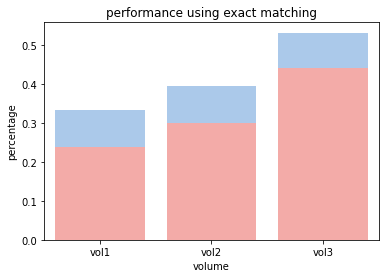

In [100]:
pick_up_rates = [vol1_wcvp_df_simplified.shape[0]/vol1_df.shape[0],
                 vol2_wcvp_df_simplified.shape[0]/vol2_df.shape[0],
                 vol3_wcvp_df_simplified.shape[0]/vol3_df.shape[0]]
accepted_rate = [(vol1_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol1_df.shape[0],
                 (vol2_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol2_df.shape[0],
                 (vol3_wcvp_df_simplified['taxonomic_status'] == 'Accepted').sum()/vol3_df.shape[0]]

ax = plt.subplots()

pastel_blue = sns.color_palette("pastel")[0]
pastel_red = sns.color_palette("pastel")[3]

ax = sns.barplot(x=['vol1', 'vol2', 'vol3'], y=pick_up_rates, color=pastel_blue, label = 'percentage picked up')
ax = sns.barplot(x=['vol1', 'vol2', 'vol3'], y=accepted_rate, color=pastel_red, label = 'percentage accepted')

ax.set(xlabel="volume", ylabel="percentage", title = "performance using exact matching")

#plt.legend()
plt.show()

In [6]:
vol3_df['mouterde_infra'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_epithet'].replace(np.nan, 'np.NaN', inplace=True)
vol3_df['mouterde_author'] = vol3_df['mouterde_author'].str.replace(' et ', ' & ')


vol3_wcvp_df = pd.merge(vol3_df, 
                        wcvp_df, 
                        how='left', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_author', 'mouterde_infra'], 
                        right_on = ['genus','species', 'authors', 'infraspecies'])

vol3_wcvp_df.replace('np.NaN', np.nan, inplace=True)
vol3_wcvp_df = vol3_wcvp_df[vol3_wcvp_df['genus'].isna()]

vol3_wcvp_df_simplified = vol3_wcvp_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]

In [7]:
vol3_wcvp_df_simplified

,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxonomic_status,accepted_name,accepted_authors
0,Acantholepis,NaN,NaN,Less.',NaN,NaN,NaN
4,Acantholimon,antilibanoticum,NaN,Mout.,NaN,NaN,NaN
7,Acantholimon,ulicinum,NaN,(Schultes) Boiss.,NaN,NaN,NaN
15,Achillea,biebersteinii,NaN,Afan.,NaN,NaN,NaN
18,Achillea,fragrantissima,NaN,(Forssk.) Schultz Bip.,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1614,Xeranthemum,longipapposum,NaN,Fisch. & Mey.,NaN,NaN,NaN
1616,Ziziphora,'Abd-el-'asissi,NaN,Hand.-Mazz.,NaN,NaN,NaN
1617,Ziziphora,acutifolia,NaN,Montb. & Auch.,NaN,NaN,NaN
1620,Ziziphora,capitata,orientalis,Sam. ex Rech. fil.,NaN,NaN,NaN


In [9]:
genus = "Acantholimon"
species = "ulicinum"
wcvp_df[(wcvp_df['genus'] == genus) & (wcvp_df['species'] == species)]

,kew_id,family,genus,species,infraspecies,taxon_name,authors,rank,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,parent_kew_id,parent_name,parent_authors,reviewed,publication,original_name_id
927819,686177-1,Plumbaginaceae,Acantholimon,ulicinum,np.NaN,Acantholimon ulicinum,(Willd. ex Schult.) Boiss.,SPECIES,Accepted,NaN,NaN,NaN,331313-2,Acantholimon,Boiss.,In review,"A.P.de Candolle, Prodr. 12: 627 (1848)",687852-1
927820,77146505-1,Plumbaginaceae,Acantholimon,ulicinum,creticum,Acantholimon ulicinum var. creticum,(Boiss.) Greuter,VARIETY,Synonym,77227031-1,Acantholimon androsaceum var. androsaceum,NaN,NaN,NaN,NaN,In review,Colloque OPTIMA Crète Guide Excurs.: 27 (1975),77146504-1
927821,920429-1,Plumbaginaceae,Acantholimon,ulicinum,lycaonicum,Acantholimon ulicinum subsp. lycaonicum,(Boiss. & Heldr.) Bokhari & J.R.Edm.,SUBSPECIES,Homotypic_Synonym,686053-1,Acantholimon lycaonicum,Boiss. & Heldr.,NaN,NaN,NaN,In review,"P.H.Davis (ed.), Fl. Turkey 7: 498 (1982)",686053-1
927822,920430-1,Plumbaginaceae,Acantholimon,ulicinum,purpurascens,Acantholimon ulicinum var. purpurascens,(Bokhari) Bokhari & J.R.Edm.,VARIETY,Accepted,NaN,NaN,NaN,686177-1,Acantholimon ulicinum,(Willd. ex Schult.) Boiss.,In review,"P.H.Davis (ed.), Fl. Turkey 7: 498 (1982)",NaN
927823,77226984-1,Plumbaginaceae,Acantholimon,ulicinum,ulicinum,Acantholimon ulicinum var. ulicinum,NaN,VARIETY,Accepted,NaN,NaN,NaN,686177-1,Acantholimon ulicinum,(Willd. ex Schult.) Boiss.,In review,NaN,NaN


In [10]:
list(set(a) & set(b))

NameError: name 'a' is not defined

In [50]:
connectors = {'ex', '&'}
def get_set(x):
    if not isinstance(x, list): #is this the best way
        x = []
    return set(x)
wcvp_df['authors_set'] = wcvp_df['authors'].str.split(' ').apply(lambda x : get_set(x) - connectors)
vol3_df['authors_set'] = vol3_df['mouterde_author'].str.split(' ').apply(lambda x : get_set(x) - connectors)

In [81]:
import re
re.sub(r'([()])', '', 'hiiii)()()(()))')

'hiiii'

In [91]:
vol3_df_explode = vol3_df.explode('authors_set')
wcvp_df_explode = wcvp_df.explode('authors_set')

def remove_prantheses(x):
    if isinstance(x, str):
        return re.sub(r'([()])', '', x)
    return x
vol3_df_explode['authors_set'] = vol3_df_explode['authors_set'].apply(remove_prantheses) #to remove prantheses
wcvp_df_explode['authors_set'] = wcvp_df_explode['authors_set'].apply(remove_prantheses) #to remove prantheses

In [95]:
vol3_wcvp_explode_df = pd.merge(vol3_df_explode, 
                        wcvp_df_explode, 
                        how='inner', 
                        left_on=['mouterde_genus','mouterde_epithet', 'mouterde_infra' , 'authors_set'], 
                        right_on = ['genus','species', 'infraspecies', 'authors_set'])

vol3_wcvp_explode_df.replace('np.NaN', np.nan, inplace=True)

vol3_wcvp_explode_df_simplified = vol3_wcvp_explode_df[['mouterde_genus', 'mouterde_epithet', 'mouterde_infra', 'mouterde_author', 'taxonomic_status', 'accepted_name', 'accepted_authors']]
vol3_wcvp_explode_df_simplified

,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxonomic_status,accepted_name,accepted_authors
0,Acantholepis,orientalis,NaN,Less.,Homotypic_Synonym,Echinops acantholepis,Jaub. & Spach
1,Acantholimon,NaN,NaN,Boiss.,Accepted,NaN,NaN
2,Acantholimon,acerosum,NaN,(Willd.) Boiss.,Accepted,NaN,NaN
3,Acantholimon,acerosum,NaN,(Willd.) Boiss.,Accepted,NaN,NaN
4,Acantholimon,damassanum,NaN,Mobayen,Accepted,NaN,NaN
...,...,...,...,...,...,...,...
1400,Ziziphora,capitata,NaN,L.,Accepted,NaN,NaN
1401,Ziziphora,tenuior,NaN,L.,Accepted,NaN,NaN
1402,Zoegea,NaN,NaN,L.,Accepted,NaN,NaN
1403,Zoegea,leptaurea,NaN,L.,Accepted,NaN,NaN


In [96]:
vol3_wcvp_explode_df_simplified.drop_duplicates()

,mouterde_genus,mouterde_epithet,mouterde_infra,mouterde_author,taxonomic_status,accepted_name,accepted_authors
0,Acantholepis,orientalis,NaN,Less.,Homotypic_Synonym,Echinops acantholepis,Jaub. & Spach
1,Acantholimon,NaN,NaN,Boiss.,Accepted,NaN,NaN
2,Acantholimon,acerosum,NaN,(Willd.) Boiss.,Accepted,NaN,NaN
4,Acantholimon,damassanum,NaN,Mobayen,Accepted,NaN,NaN
5,Acantholimon,libanoticum,NaN,Boiss.,Accepted,NaN,NaN
...,...,...,...,...,...,...,...
1400,Ziziphora,capitata,NaN,L.,Accepted,NaN,NaN
1401,Ziziphora,tenuior,NaN,L.,Accepted,NaN,NaN
1402,Zoegea,NaN,NaN,L.,Accepted,NaN,NaN
1403,Zoegea,leptaurea,NaN,L.,Accepted,NaN,NaN
